## Observations and Insights 

In [21]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
pyma_combo = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
pyma_combo.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [22]:
# Checking the number of mice.
mice = pyma_combo['Mouse ID'].count()
mice

1893

In [23]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = pyma_combo[pyma_combo.duplicated(['Mouse ID', 'Timepoint'])]
duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [24]:
# Optional: Get all the data for the duplicate mouse ID. 

pyma_duplicates = pyma_combo.loc[pyma_combo['Mouse ID'] == 'g989']
pyma_duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [25]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
pyma_unique = pd.DataFrame(pyma_combo.drop_duplicates(subset =(['Mouse ID', 'Timepoint'])))
pyma_unique = pyma_unique.reset_index(drop=True,inplace=False)
pyma_unique

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1883,z969,Naftisol,Male,9,30,25,63.145652,2
1884,z969,Naftisol,Male,9,30,30,65.841013,3
1885,z969,Naftisol,Male,9,30,35,69.176246,4
1886,z969,Naftisol,Male,9,30,40,70.314904,4


In [26]:
# Checking the number of mice in the clean DataFrame.
pyma_unique['Mouse ID'].nunique()

249

## Summary Statistics

In [27]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
pymastats = pyma_unique.groupby('Drug Regimen')

pymagrp = pd.DataFrame()
pymagrp['Mean'] = pymastats['Tumor Volume (mm3)'].mean()
pymagrp['Median'] = pymastats['Tumor Volume (mm3)'].median()
pymagrp['Variance'] = pymastats['Tumor Volume (mm3)'].var()
pymagrp['StdDev'] = pymastats['Tumor Volume (mm3)'].std()
pymagrp['StdError'] = pymastats['Tumor Volume (mm3)'].sem()
pymagrp

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

props = pyma_unique.groupby('Drug Regimen')

propSummary = pd.DataFrame()
propSummary["Mean"] = props["Tumor Volume (mm3)"].mean()
propSummary["Median"] = props["Tumor Volume (mm3)"].median()
propSummary["Variance"] = props["Tumor Volume (mm3)"].var()
propSummary["Std Dev"] = props["Tumor Volume (mm3)"].std()
propSummary["Std Error"] = props["Tumor Volume (mm3)"].sem()
propSummary

,Mean,Median,Variance,Std Dev,Std Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [28]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
aggregate = pyma_unique.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])
aggregate

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [29]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
cleaned = pyma_unique.loc[pyma_unique['Drug Regimen'] != '\n']

mice = cleaned.groupby('Drug Regimen')
micecount = mice['Mouse ID'].count()
micecount


Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     156
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

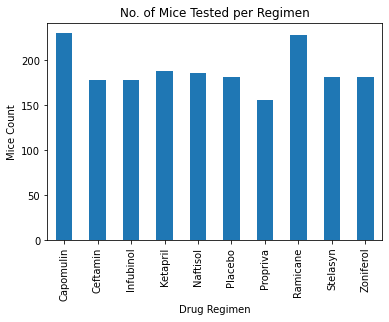

<Figure size 432x288 with 0 Axes>

In [30]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

mice_chart = micecount.plot(kind='bar', title = 'No. of Mice Tested per Regimen')
mice_chart.set_xlabel("Drug Regimen")
mice_chart.set_ylabel('Mice Count')
plt.show()
plt.tight_layout()

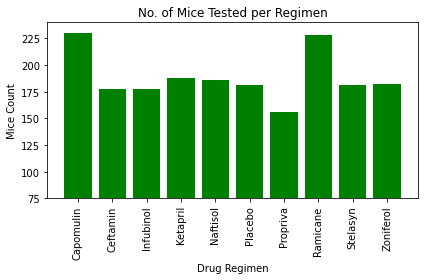

Male      958
Female    930
Name: Sex, dtype: int64

In [31]:
# Generate a pie plot showing the distribution of female versus male mice using pandas


micecount

count = mice.count()
count.reset_index(inplace=True) 
plt.bar(count['Drug Regimen'], count['Mouse ID'], color ='g')
plt.xticks(rotation='vertical')

# Set x and y limits
#plt.xlim(0, len(x_axis))
plt.ylim(75, max(count["Mouse ID"])+10)

# Set a Title and labels
plt.title("No. of Mice Tested per Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Mice Count")

plt.tight_layout()
plt.show()

#Count of Female and Male
gender  = pyma_unique['Sex'].value_counts()
gender

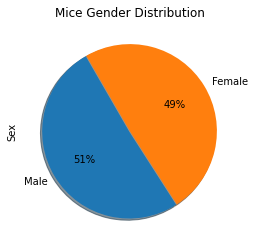

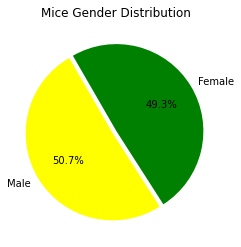

In [32]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender  = pyma_unique['Sex'].value_counts()
gender

explode = (0.01,0)
gender_pie = gender.plot(kind='pie', explode=explode, title = 'Mice Gender Distribution', 
                          shadow = True, autopct="%1.0f%%",startangle=120)

plt.show()


# Generate a pie plot showing the distribution of female versus male mice using pyplot

#gender2 = pyma_unique['Sex'].value_counts()

gender = gender.reset_index(inplace=False)
gender = gender.rename(columns={'index': 'Gender','Sex': 'Count'})

#labels for sections of the pie chart
labels = gender['Gender']

#values for each section
number = gender['Count']

#colors
colors = ['yellow', 'green']
explode = (0.05,0)

# Creates the pie chart based upon the values above
# Automatically finds the sections of each part of the pie chart
plt.pie(number, labels=labels, colors=colors,explode=explode, startangle=120, 
         shadow=False, autopct="%1.1f%%")
plt.title("Mice Gender Distribution")
plt.show()

## Quartiles, Outliers and Boxplots

In [33]:

# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

maxtime = pyma_unique.groupby(['Mouse ID'])['Timepoint'].max()
maxtime.head()


Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
Name: Timepoint, dtype: int64

In [34]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
pymamerge = pd.merge(pyma_unique, maxtime, on='Mouse ID')
pymamerge = pymamerge.rename(columns={'Timepoint_x': 'ID/Drug Timepoint','Timepoint_y':'Max Timepoint'})
pymamerge.head()



# Put treatments into a list for for loop (and later for plot labels)

drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

#new DF
series = pymamerge['Drug Regimen'].isin(drugs)
pymanew = pymamerge[series]
pymanew.reset_index(inplace=True,drop=True)
pymanew.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),ID/Drug Timepoint,Tumor Volume (mm3),Metastatic Sites,Max Timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45


In [38]:
# Create empty list to fill with tumor vol data (for plotting)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes

capotumorvol = [pymanew['Tumor Volume (mm3)'][row] for row in range(len(pymanew)) if pymanew['Drug Regimen'][row] == 'Capomulin']   
ramitumorvol = [pymanew['Tumor Volume (mm3)'][row] for row in range(len(pymanew)) if pymanew['Drug Regimen'][row] == 'Ramicane']   
infutumorvol = [pymanew['Tumor Volume (mm3)'][row] for row in range(len(pymanew)) if pymanew['Drug Regimen'][row] == 'Infubinol']      
ceftumorvol = [pymanew['Tumor Volume (mm3)'][row] for row in range(len(pymanew)) if pymanew['Drug Regimen'][row] == 'Ceftamin']

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Determine outliers using upper and lower bounds

#Capomulin
ctuvol = pd.Series(capotumorvol)

#IQR
cquartiles = ctuvol.quantile([0.25,0.5,0.75])
caplowerq = cquartiles[0.25]
capupperq = cquartiles[0.75]
capiqr = capupperq - caplowerq
caplower_bound = caplowerq - (1.5 * capiqr)
capupper_bound = capupperq + (1.5 * capiqr)

#outliers
capoutliers = [vol for vol in ctuvol if vol < caplower_bound or vol > capupper_bound]

len(capoutliers)
capoutliers_distinct = list(set(capoutliers))
len(capoutliers_distinct)
capoutliers_distinct.sort()
capoutliers_distinct  

capoutliers_distinct


[23.34359787, 25.47214326]

In [39]:
rtuvol = pd.Series(ramitumorvol)
#IQR
ramquartiles = rtuvol.quantile([0.25,0.5,0.75])
ramlowerq = ramquartiles[0.25]
ramupperq = ramquartiles[0.75]
ramiqr = ramupperq - ramlowerq
ramlower_bound = ramlowerq - (1.5 * ramiqr)
ramupper_bound = ramupperq + (1.5 * ramiqr)

#outliers

ramoutliers = [vol for vol in rtuvol if vol < ramlower_bound or vol > ramupper_bound]

len(ramoutliers)
ramoutliers_distinct = list(set(ramoutliers))
len(ramoutliers_distinct)
ramoutliers_distinct.sort()
ramoutliers_distinct

[22.05012627]

In [40]:
ituvol = pd.Series(infutumorvol)

#IQR
infquartiles = ituvol.quantile([0.25,0.5,0.75])
inflowerq =  infquartiles[0.25]
infupperq =  infquartiles[0.75]
infiqr = infupperq - inflowerq
inflower_bound = inflowerq - (1.5 * infiqr)
infupper_bound = infupperq + (1.5 * infiqr)

#outliers

infoutliers = [vol for vol in ituvol if vol < inflower_bound or vol > infupper_bound]
infquartiles, inflowerq, infupperq, infiqr, inflower_bound,infupper_bound, ituvol.min()
len(infoutliers)
infoutliers_distinct = list(set(infoutliers))
len(infoutliers_distinct)
infoutliers_distinct.sort()
infoutliers_distinct

[]

In [41]:
cetuvol = pd.Series(ceftumorvol)
#IQR
cequartiles = cetuvol.quantile([0.25,0.5,0.75])
celowerq = cequartiles[0.25]
ceupperq = cequartiles[0.75]
ceiqr = ceupperq - celowerq
celower_bound = celowerq - (1.5 * ceiqr)
ceupper_bound = ceupperq + (1.5 * ceiqr)

#outliers
#tumvol = list(tumorvol)
ceoutliers = [vol for vol in cetuvol if vol < celower_bound or vol > ceupper_bound]

len(ceoutliers)
ceoutliers_distinct = list(set(ceoutliers))
len(ceoutliers_distinct)
ceoutliers_distinct.sort()
ceoutliers_distinct

[]

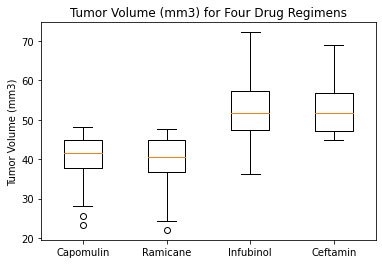

In [42]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume (mm3) for Four Drug Regimens')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot([ctuvol, rtuvol, ituvol, cetuvol], showfliers=True)
plt.xticks([1,2,3,4],['Capomulin', 'Ramicane','Infubinol','Ceftamin'])
plt.show()

## Line and Scatter Plots

In [43]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
cleaned = pymanew.loc[pymanew['ID/Drug Timepoint'] != '\n']
capomulin = cleaned.loc[pymanew['Drug Regimen'] == 'Capomulin']

C:\Users\SaNdE\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [44]:
#Mouse ID input
user_input = input("Which Mouse ID are you looking for? ")

Which Mouse ID are you looking for? 1509


In [45]:
#calculating x and y axis
vol = capomulin.loc[capomulin['Mouse ID'] == user_input,'Tumor Volume (mm3)']
mice = capomulin['Mouse ID']
time = capomulin.loc[capomulin['Mouse ID'] == user_input,'ID/Drug Timepoint']

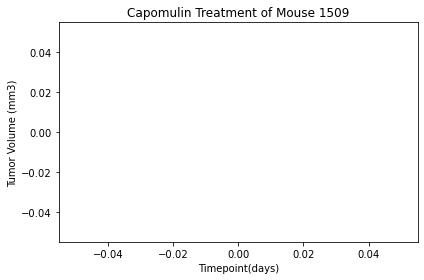

In [46]:
#line graph of x and y axis
tumorgraph, = plt.plot(time, vol, color='blue')

plt.xlabel('Timepoint(days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title("Capomulin Treatment of Mouse"+' '+user_input)
plt.tight_layout()
plt.show()

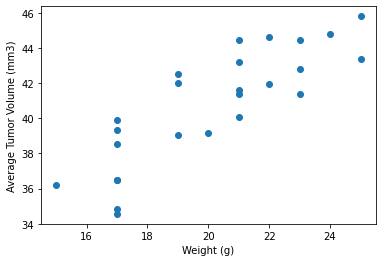

In [48]:

# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin = capomulin.loc[capomulin['Mouse ID'] != '\n']
capomulin = capomulin.reset_index(drop=True, inplace=False)

tumorave = capomulin.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
weight = capomulin.groupby('Mouse ID')['Weight (g)'].mean()

plt.scatter(weight, tumorave)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

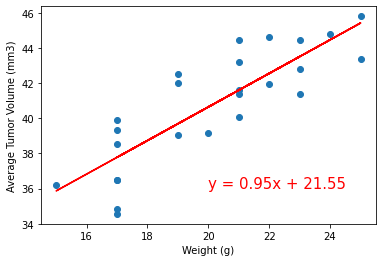

In [49]:
correlation = st.pearsonr(weight,tumorave)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight, tumorave)
regress_values = weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(weight, tumorave)
plt.plot(weight,regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

In [50]:
print(f"The correlation between Ave Tumor and Ave Weight is {round(correlation[0],2)}." )
print(f'The r-squared is: {rvalue**2}.')

The correlation between Ave Tumor and Ave Weight is 0.84.
The r-squared is: 0.7088568047708717.
